<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/ejercicio_clasificacion_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [21]:
# carga del data set
df = pd.read_csv('sample_data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
# comprobamos col unnamed
print("NaNs en X:", X.isna().sum().sum())
print("Columnas con NaNs:", X.columns[X.isna().any()].tolist())


NaNs en X: 569
Columnas con NaNs: ['Unnamed: 32']


In [24]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [25]:
# preparamos y: 1 = maligno "M", 0 = benigno "B"

# borramos unnamed
df = df.drop(columns=["Unnamed: 32"])

# uso de .map para convertir la columna de texto a 1/0
y = df["diagnosis"].map({"M": 1, "B": 0})

# X: quitamos id y diagnosis (id no aporta para clasificar)
X = df.drop(columns=["id", "diagnosis"])

print("X shape:", X.shape)
print("y mean (proporción malignos):", y.mean())

X shape: (569, 30)
y mean (proporción malignos): 0.37258347978910367


In [26]:
# dividimos los datos entre tran y test + funcion de evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, titulo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"\n--- {titulo} ---")
    print("Score (accuracy):", modelo.score(X_test, y_test))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[0,1])
    disp.ax_.set_title(titulo)
    plt.show()

    return modelo


In [27]:
# escalado de datos en KNN y regresión recomenddado
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)



--- KNN (k=5, StandardScaler) ---
Score (accuracy): 0.956140350877193
Confusion matrix:
 [[71  1]
 [ 4 38]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



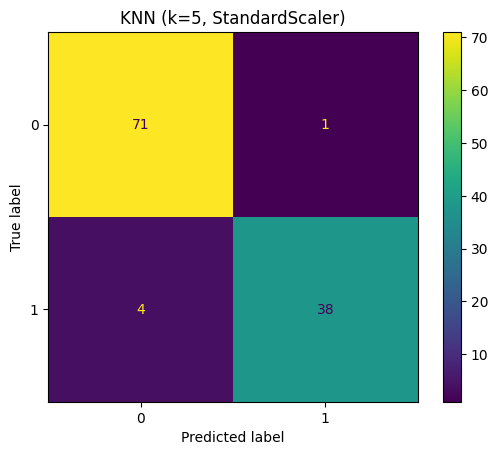

KNeighborsClassifier()

In [28]:
# vecinos KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
evaluar_modelo(knn, X_train_sc, X_test_sc, y_train, y_test, "KNN (k=5, StandardScaler)")



--- Regresión lineal (umbral 0.5) ---
Confusion matrix:
 [[72  0]
 [ 4 38]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



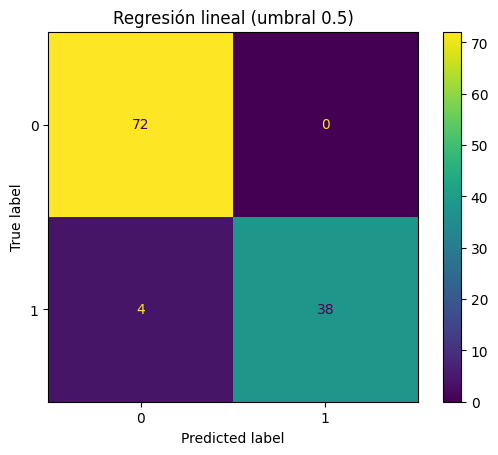

In [31]:
# regresion lineal

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)

# Predicción
y_score = linreg.predict(X_test_sc)

# Pasar a clase con umbral 0.5
y_pred = (y_score >= 0.5).astype(int)

print("\n--- Regresión lineal (umbral 0.5) ---")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[0,1])
disp.ax_.set_title("Regresión lineal (umbral 0.5)")
plt.show()



--- Regresión polinomial grado=2 (umbral 0.5) ---
Confusion matrix:
 [[54 18]
 [24 18]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72        72
           1       0.50      0.43      0.46        42

    accuracy                           0.63       114
   macro avg       0.60      0.59      0.59       114
weighted avg       0.62      0.63      0.62       114



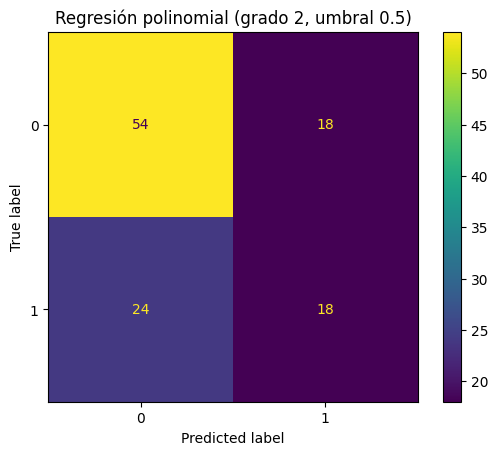

In [32]:
# regresion polinomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

poly_clf = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("linreg", LinearRegression())])

poly_clf.fit(X_train_sc, y_train)

y_score = poly_clf.predict(X_test_sc)
y_pred = (y_score >= 0.5).astype(int)

print("\n--- Regresión polinomial grado=2 (umbral 0.5) ---")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[0,1])
disp.ax_.set_title("Regresión polinomial (grado 2, umbral 0.5)")
plt.show()



--- GaussianNB (StandardScaler) ---
Score (accuracy): 0.9210526315789473
Confusion matrix:
 [[69  3]
 [ 6 36]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



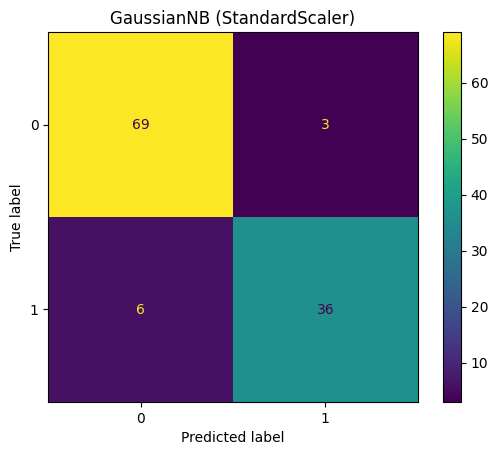

GaussianNB()

In [30]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# GaussianNB con datos escalados
evaluar_modelo(gnb, X_train_sc, X_test_sc, y_train, y_test, "GaussianNB (StandardScaler)")
